In [1]:
# Kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
# CSV fayldan ma'lumotlarni yuklaymiz
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")

In [7]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
# Ma'lumotlar qanday ko'rinishda ekanligini tekshirib olamiz
print(df.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

In [9]:
# Xususiyatlar (features) va nishon (target) ustunlarini aniqlaymiz
# Masalan: 'feature1', 'feature2', va 'target' ustunlari bor deb faraz qilamiz
X = df[['Clump Thickness', 'Uniformity of Cell Size']]  # Kiruvchi xususiyatlar
y = df['Class']                  # Chiquvchi nishon (klass)

In [11]:
X

,Clump Thickness,Uniformity of Cell Size
0,5,1
1,5,4
2,3,1
3,6,8
4,4,1
...,...,...
678,3,1
679,2,1
680,5,10
681,4,8


In [13]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [15]:
# Ma'lumotlarni train va test ga ajratamiz (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Random Forest Classification modelini yaratamiz
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
# Modelni o'qitamiz
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:

# Test ma'lumotlariga asoslanib bashorat qilamiz
y_pred = model.predict(X_test)

In [23]:
# Modelni baholaymiz
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.66%


In [25]:
# Batafsil klassifikatsiya natijasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           2       0.91      0.99      0.95       127
           4       0.99      0.85      0.91        78

    accuracy                           0.94       205
   macro avg       0.95      0.92      0.93       205
weighted avg       0.94      0.94      0.94       205



In [27]:
# Confusion Matrix ko'rish uchun
cm = confusion_matrix(y_test, y_pred)

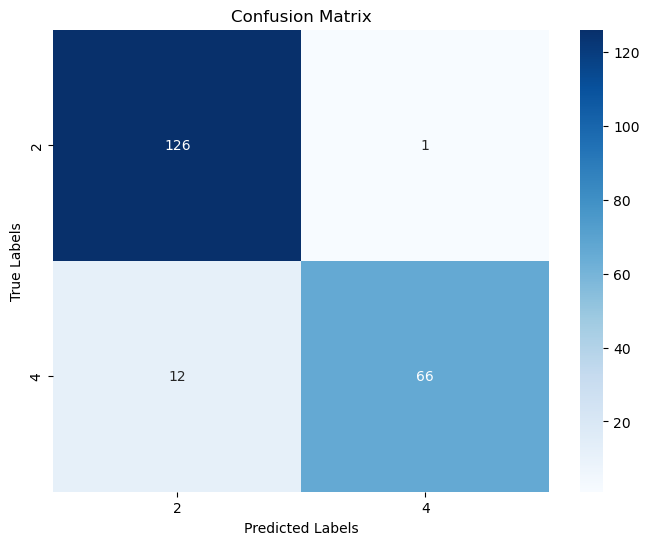

In [29]:
# Confusion matrixni chizamiz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
# Agar faqat 2ta feature bo'lsa, klassifikatsiya chizig'ini ham ko'rsatish mumkin
# Decision boundary uchun grafik chizamiz
import numpy as np

In [33]:
# Mesh grid yasaymiz
x_min, x_max = X['Clump Thickness'].min() - 1, X['Clump Thickness'].max() + 1
y_min, y_max = X['Uniformity of Cell Size'].min() - 1, X['Uniformity of Cell Size'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [35]:
# Har bir nuqtada model bashoratini olamiz
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


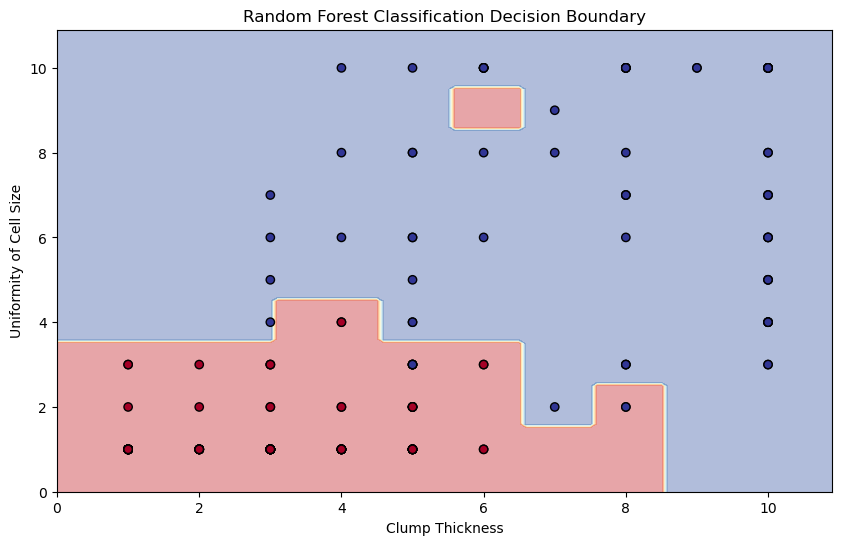

In [39]:
# Grafik chizamiz
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_test['Clump Thickness'], X_test['Uniformity of Cell Size'], c=y_test, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('Random Forest Classification Decision Boundary')
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.show()